In [8]:
import numpy as np
import torch
from data_provider.data_factory import *
from torch.utils.data import DataLoader
import argparse
import random
import matplotlib.pyplot as plt

In [11]:
parser = argparse.ArgumentParser(description='Time Series Forecasting')
# data loader
parser.add_argument('--data', type=str, default='custom', help='dataset type')
# parser.add_argument('--root_path', type=str, default='../dataset/ETT-small/', help='root path of the data file')
# parser.add_argument('--data_path', type=str, default='ETTh1.csv', help='data file')
parser.add_argument('--root_path', type=str, default='../dataset/traffic/', help='root path of the data file')
parser.add_argument('--data_path', type=str, default='traffic.csv', help='data file')
parser.add_argument('--features', type=str, default='M',
                    help='forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate')
parser.add_argument('--target', type=str, default='OT', help='target feature in S or MS task')
parser.add_argument('--freq', type=str, default='h',
                    help='freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h')
parser.add_argument('--checkpoints', type=str, default='./checkpoints/', help='location of model checkpoints')
parser.add_argument('--embed', type=str, default='timeF', help='time features encoding, options:[timeF, fixed, learned]')
parser.add_argument('--batch_size', type=int, default=1, help='batch size of train input data')
parser.add_argument('--seq_len', type=int, default=1024, help='input sequence length')
parser.add_argument('--label_len', type=int, default=0, help='start token length')
parser.add_argument('--pred_len', type=int, default=96, help='prediction sequence length')
parser.add_argument('--num_workers', type=int, default=0, help='data loader num workers')
args = parser.parse_args(args=[])

In [12]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [13]:
data_set, data_loader = data_provider(args, 'train')

train 11161


In [14]:
x = next(iter(data_loader))[0]
y = next(iter(data_loader))[1]

In [15]:
s = torch.cat([x, y], dim=1)
s.shape

torch.Size([1, 1120, 862])

## Demonstration of various variates

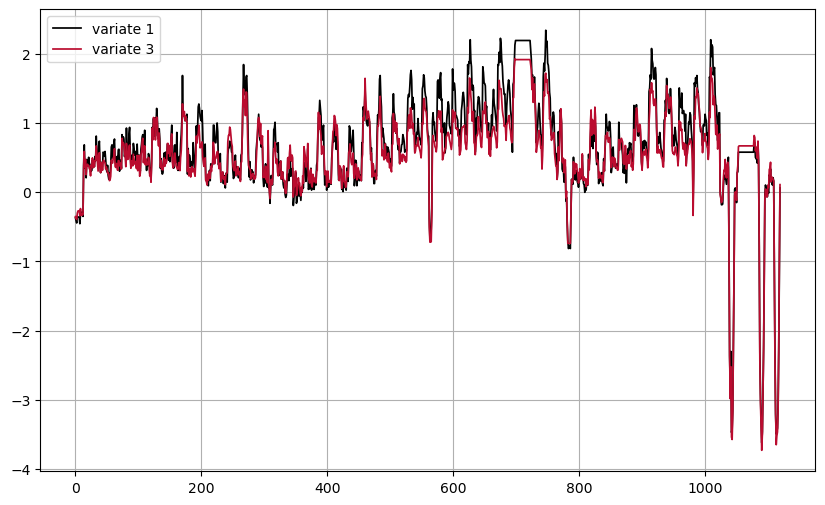

In [ ]:
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s[0,:,0], c='black', linewidth=1.25, label='variate 1')
plt.plot(s[0,:,2], c='#ba0c2f', linewidth=1.25, label='variate 3')
plt.grid()
plt.legend()
# plt.show()
# plt.savefig('./variate-1.pdf', format='pdf')

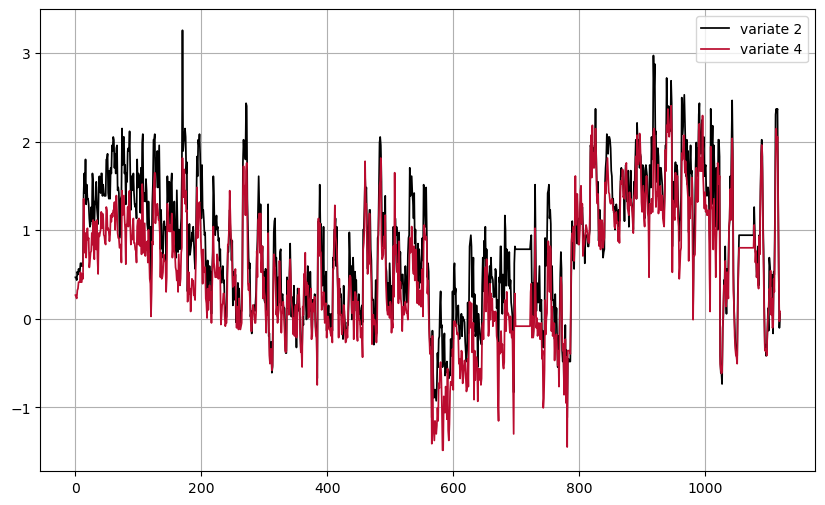

In [ ]:
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s[0,:,1], c='black', linewidth=1.25, label='variate 2')
plt.plot(s[0,:,3], c='#ba0c2f', linewidth=1.25, label='variate 4')
plt.grid()
plt.legend()
# plt.savefig('./variate-2.pdf', format='pdf')

## Demonstration of Sparse Sampling (ETTh1)

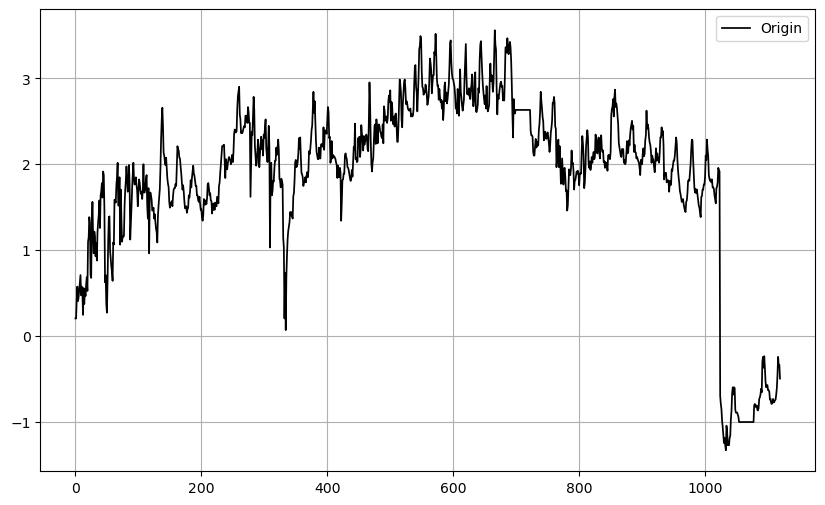

In [ ]:
s_ = s[0,:,-1]
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_, c='black', linewidth=1.25, label='Origin')
# plt.plot(s_, c='#ba0c2f', linewidth=1.25, label='variate 2')
plt.grid()
plt.legend()
# plt.show()
# plt.savefig('./temporal_ori.pdf', format='pdf')

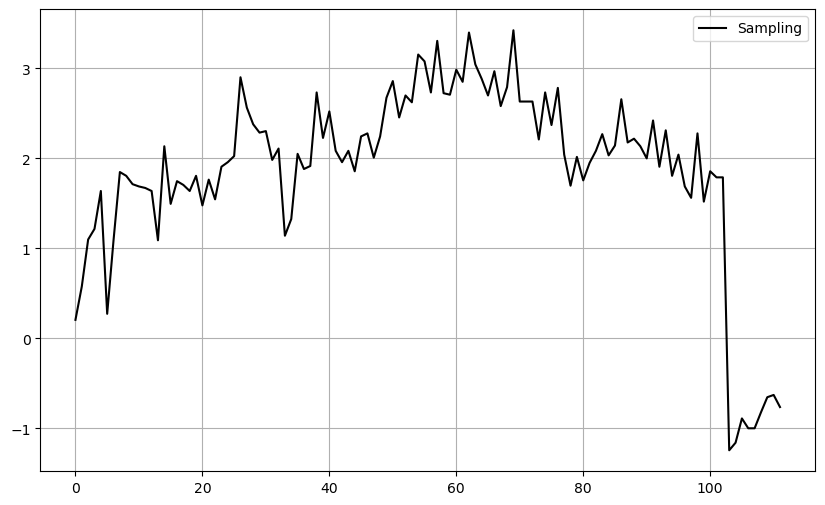

In [ ]:
# sparse sampling
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_[::10], c='black', linewidth=1.5, label='Sampling')
plt.grid()
plt.legend()
# plt.show()
# plt.savefig('./temporal_samp.pdf', format='pdf')

[]

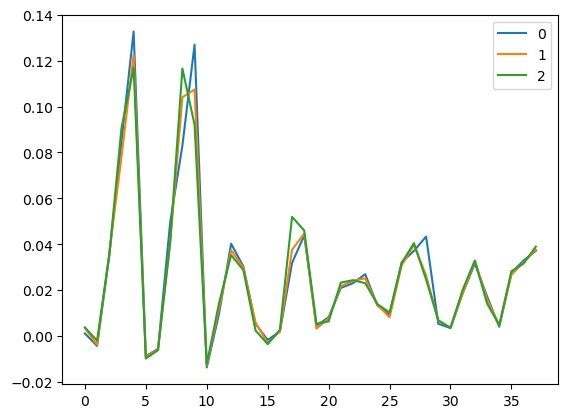

In [11]:
plt.plot(s_[0::30], label=0)
plt.plot(s_[1::30], label=1)
plt.plot(s_[2::30], label=2)
# plt.plot(s_[100::20], label=50)
plt.legend()
plt.plot()

## Demonstration of Sparse Sampling (ELC)

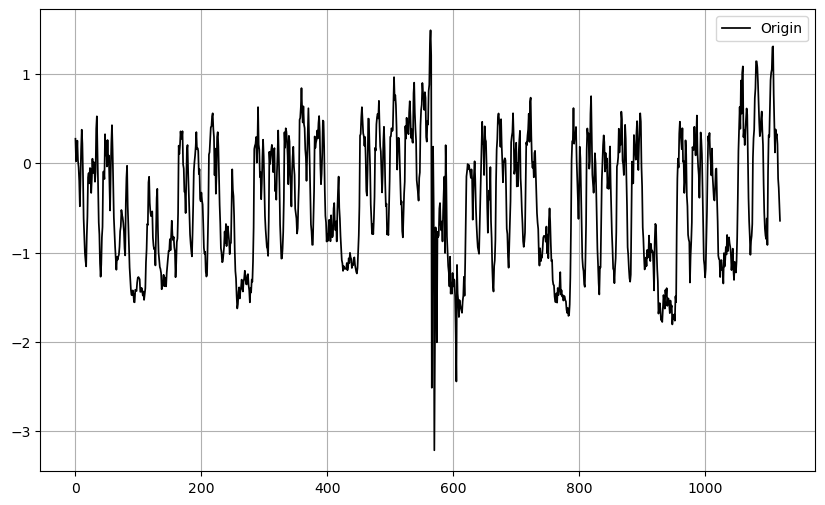

In [9]:
s_ = s[0,:,-1]
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_, c='black', linewidth=1.25, label='Origin')
# plt.plot(s_, c='#ba0c2f', linewidth=1.25, label='variate 2')
plt.grid()
plt.legend()
# plt.show()
# plt.savefig('./temporal_ori.pdf', format='pdf')

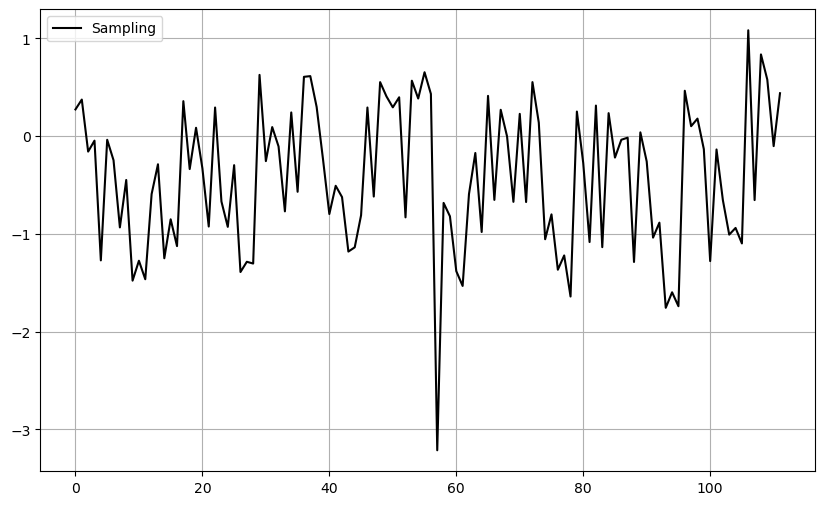

In [10]:
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_[::10], c='black', linewidth=1.5, label='Sampling')
plt.grid()
plt.legend()
# plt.show()

## Demonstration of Sparse Sampling (traffic)

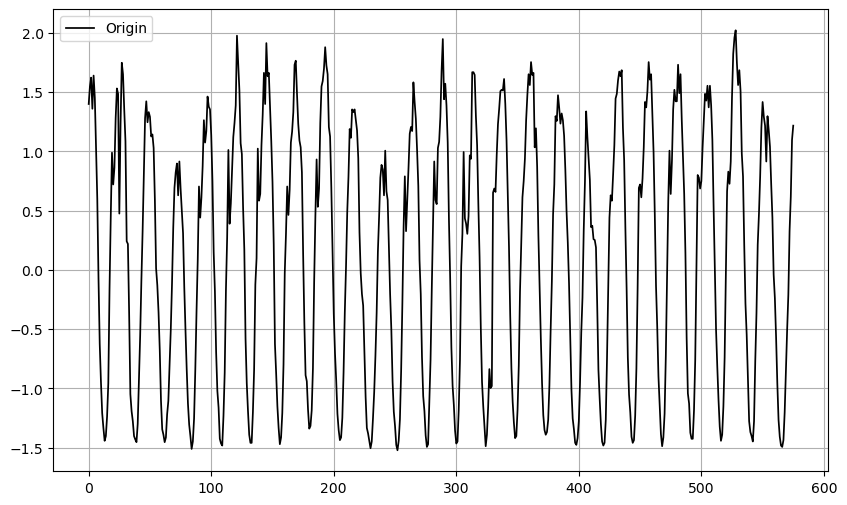

In [23]:
s_ = s[0,:576,-1]
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_, c='black', linewidth=1.25, label='Origin')
# plt.plot(s_, c='#ba0c2f', linewidth=1.25, label='variate 2')
plt.grid()
plt.legend()
# plt.show()
# plt.savefig('./temporal_ori.pdf', format='pdf')

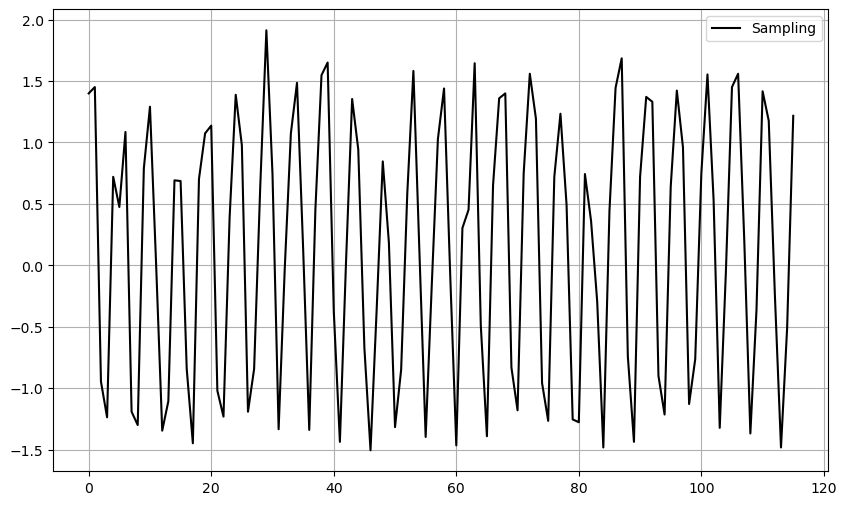

In [24]:
plt.figure(figsize=(10, 6))
# for i in range(0, 4):
plt.plot(s_[::5], c='black', linewidth=1.5, label='Sampling')
plt.grid()
plt.legend()
# plt.show()